In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import imblearn
import seaborn as sns

**Reading Dataset*

In [197]:
df=pd.read_csv('LoanData.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [198]:
df.shape

(614, 13)

In [199]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [201]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [202]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [203]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


**Missing Values**

In [204]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Filling Categorical Data with mode

In [205]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Filling Numerical Data with Median

In [206]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [207]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: ylabel='CoapplicantIncome'>

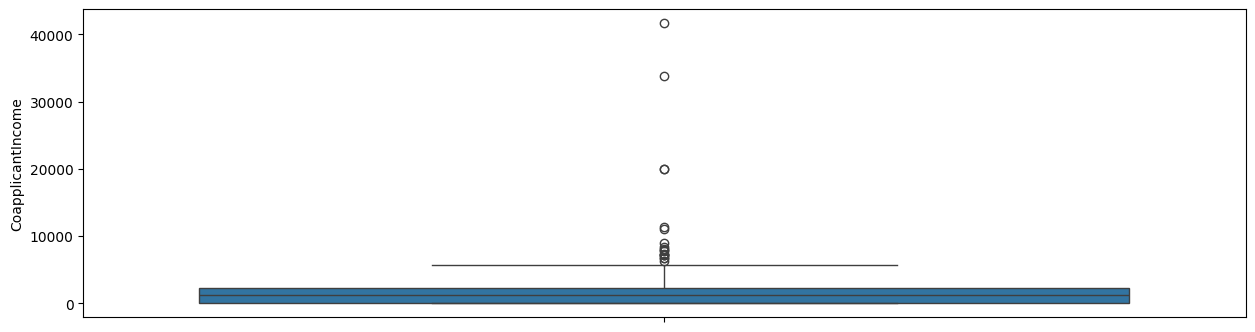

In [208]:
sns.boxplot(df['CoapplicantIncome'])


<Axes: ylabel='ApplicantIncome'>

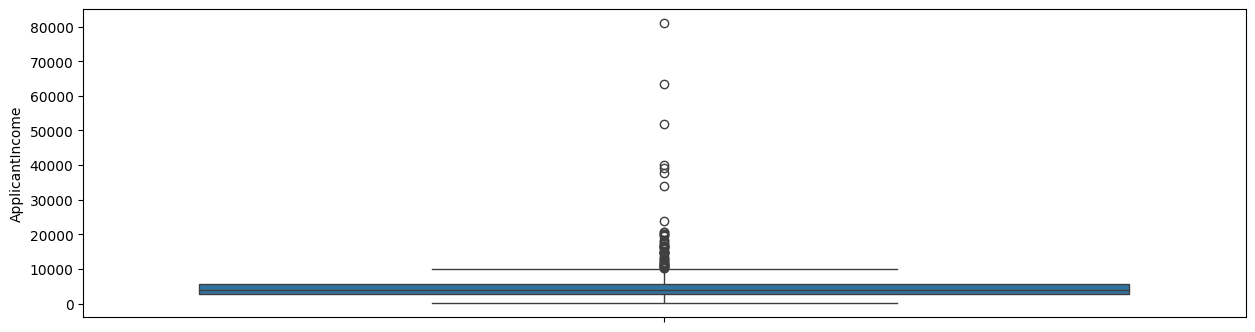

In [209]:
sns.boxplot(df['ApplicantIncome'])

<Axes: ylabel='LoanAmount'>

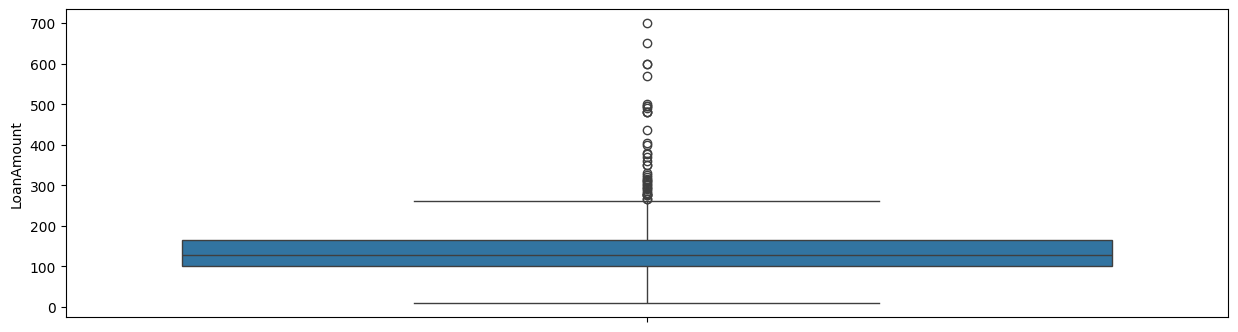

In [210]:
sns.boxplot(df['LoanAmount'])

In [211]:
print('before removing outlier',df.shape)

before removing outlier (614, 13)


In [212]:
#Removing otliers
df=df[df['ApplicantIncome']<25000]
df=df[df['CoapplicantIncome']<10000]
df=df[df['LoanAmount']<400]
print('after removing outlier',df.shape)

after removing outlier (590, 13)


In [213]:
df.shape

(590, 13)

Univariate Data Analysis

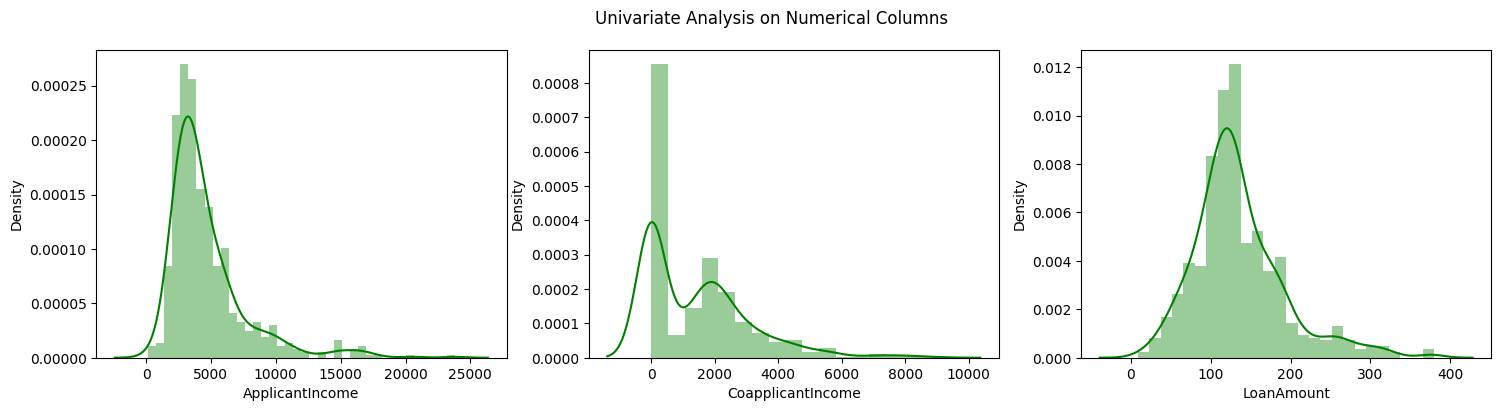

In [214]:
plt.rcParams['figure.figsize']=(18,4)
plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'],color='green')
plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'],color='green')
plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'],color='green')
plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

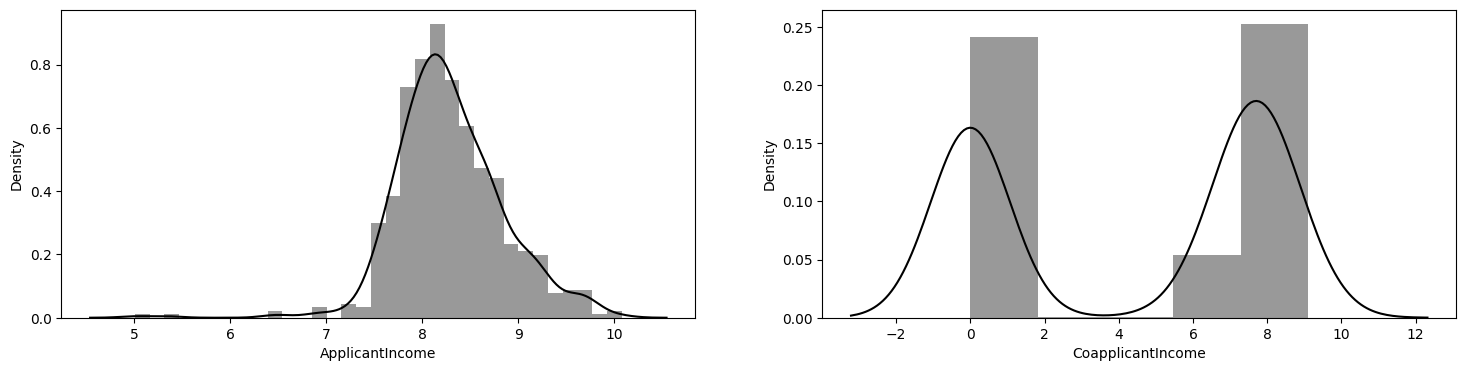

In [215]:
#Removing Skewness
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(18,4)
# applying log transformation method
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=np.log1p(df['CoapplicantIncome'])

# checking whether skewness removed or not
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'],color='black')
plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome'],color='black')


<Axes: xlabel='count', ylabel='Loan_Status'>

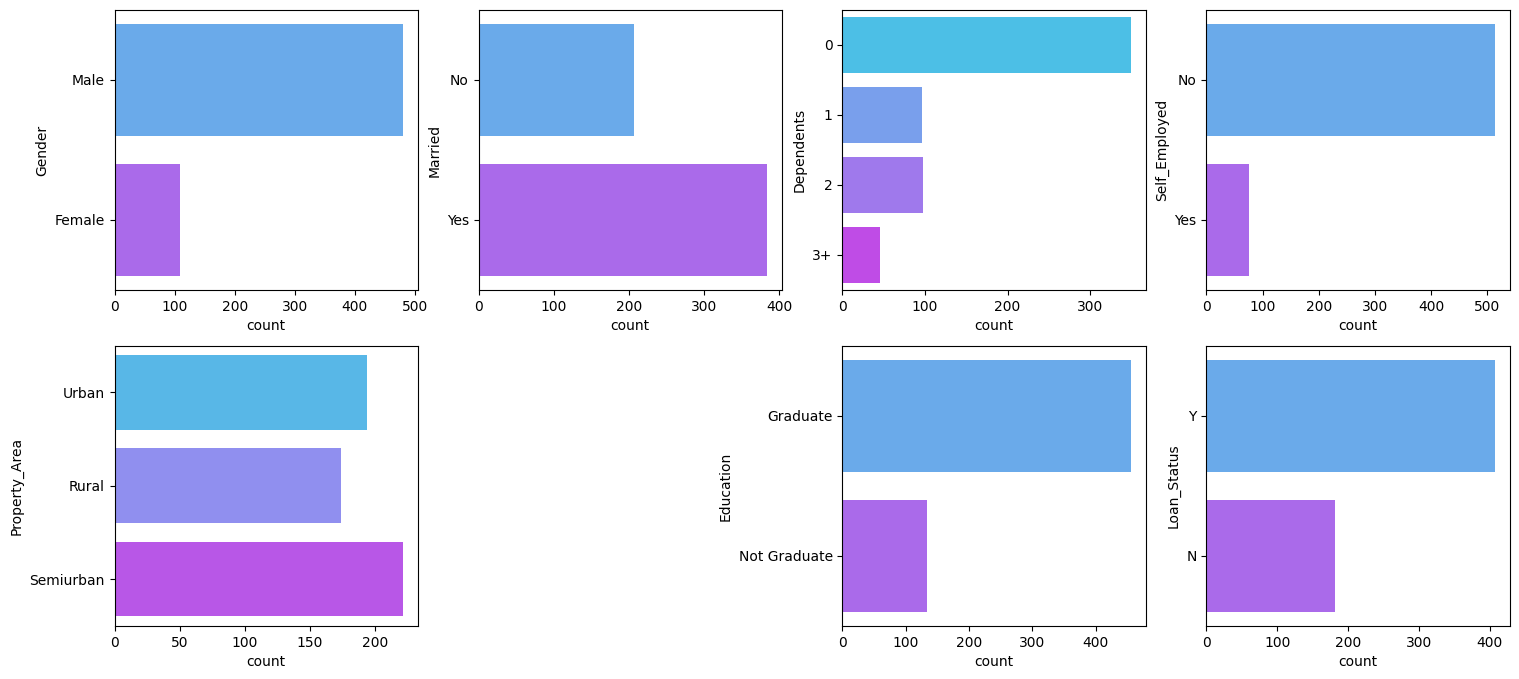

In [216]:
# Univariate Analysis on Categorical columns
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,4,1)
sns.countplot(df['Gender'],palette='cool')
plt.subplot(2,4,2)
sns.countplot(df['Married'],palette='cool')
plt.subplot(2,4,3)
sns.countplot(df['Dependents'],palette='cool')
plt.subplot(2,4,4)
sns.countplot(df['Self_Employed'],palette='cool')
plt.subplot(2,4,5)
#sns.countplot(df['Credit_History'],palette='cool')
#plt.subplot(2,4,6)
sns.countplot(df['Property_Area'],palette='cool')
plt.subplot(2,4,7)
sns.countplot(df['Education'],palette='cool')
plt.subplot(2,4,8)
sns.countplot(df['Loan_Status'],palette='cool')


Bivariate Analysis

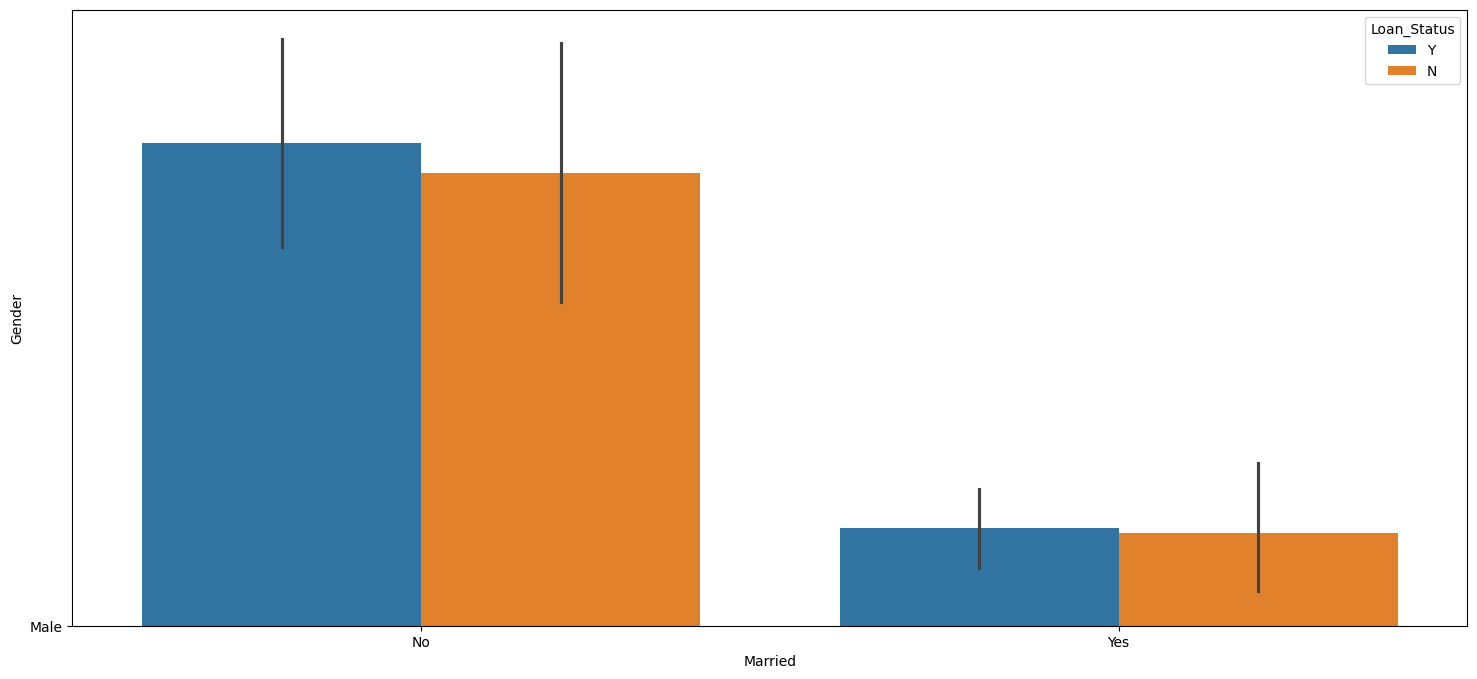

In [217]:
#sns.barplot(x=df["Gender"],y=df['Married'],hue=df["Loan_Status"])
sns.barplot(y=df["Gender"],x=df['Married'],hue=df["Loan_Status"],data=df)
plt.gca().invert_yaxis()

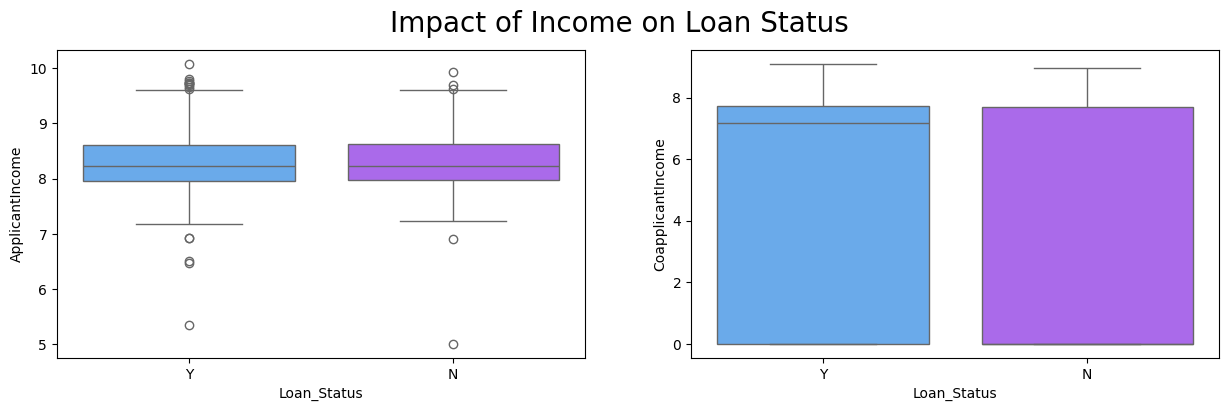

In [218]:
### Lets check the Impact of Income of Applicant and Co-applicant on Loan Status

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Loan_Status'], y=df['ApplicantIncome'],palette='cool')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Loan_Status'], y=df['CoapplicantIncome'],palette='cool')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

Comparing Categorical data with Target Column

In [219]:
# lets compare all the Categories with respect to the Loan Status to understand the Overall Impact

print("Impact of Marraige on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Married']))
print('\n')

print("Impact of Dependents on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Dependents']))
print('\n')

print("Impact of Education on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Education']))
print('\n')

print("Impact of Employment on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Self_Employed']))
print('\n')

print("Impact of Property on Loan Status")
print(pd.crosstab(df['Loan_Status'], df['Property_Area']))

Impact of Marraige on Loan Status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129


#  **DATA PROCESSING**

In [220]:
print(df.isnull().sum(),'shape of dataframe','----',df.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64 shape of dataframe ---- (590, 13)


In [221]:
df.drop(columns=['Loan_ID'],inplace=True)

In [222]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=df['Dependents'].astype(int)

In [223]:
df['Loan_Status']=df['Loan_Status'].replace('Y',1)
df['Loan_Status']=df['Loan_Status'].replace('N',0)
df['Loan_Status']=df['Loan_Status'].astype(int)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             590 non-null    object 
 1   Married            590 non-null    object 
 2   Dependents         590 non-null    int64  
 3   Education          590 non-null    object 
 4   Self_Employed      590 non-null    object 
 5   ApplicantIncome    590 non-null    float64
 6   CoapplicantIncome  590 non-null    float64
 7   LoanAmount         590 non-null    float64
 8   Loan_Amount_Term   590 non-null    float64
 9   Credit_History     590 non-null    float64
 10  Property_Area      590 non-null    object 
 11  Loan_Status        590 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 59.9+ KB


In [225]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
437,Male,Yes,0,Graduate,No,7.702104,7.026427,128.0,360.0,1.0,Urban,1
562,Male,Yes,0,Graduate,No,8.686598,7.628031,211.0,360.0,1.0,Rural,1
537,Male,No,2,Graduate,No,8.193400,0.000000,107.0,360.0,1.0,Semiurban,1
349,Male,Yes,0,Graduate,No,7.872836,8.740497,187.0,360.0,1.0,Rural,1
466,Male,Yes,3,Not Graduate,No,7.988543,7.417580,70.0,180.0,0.0,Urban,0


In [226]:
df.shape

(590, 12)

In [227]:
y=df['Loan_Status']
X=df.drop(columns=['Loan_Status'])

In [228]:
print(X.shape,y.shape)


(590, 11) (590,)


In [229]:
##Balancing Data

from imblearn import over_sampling
from collections import Counter
Counter(y)

Counter({1: 408, 0: 182})

In [230]:
over = over_sampling.RandomOverSampler()
X_resampled, y_resampled = over.fit_resample(X, y)
print('Before smoteen','-----',Counter(y))
print('After smoteen','-----',Counter(y_resampled))

Before smoteen ----- Counter({1: 408, 0: 182})
After smoteen ----- Counter({1: 408, 0: 408})


In [231]:
y=y_resampled
X=X_resampled

In [232]:
print(X.shape,y.shape)

(816, 11) (816,)


# **Train Test Split**

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [234]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
448,Male,No,0,Graduate,No,8.334712,0.000000,98.0,360.0,0.0,Semiurban
335,Male,Yes,0,Graduate,No,7.823646,7.807510,160.0,360.0,1.0,Semiurban
294,Female,No,0,Graduate,No,8.517193,0.000000,132.0,360.0,1.0,Rural
684,Male,No,0,Graduate,No,8.668196,8.207129,311.0,360.0,1.0,Rural
79,Female,No,0,Graduate,No,8.254789,0.000000,111.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
71,Male,No,0,Graduate,No,8.160518,0.000000,81.0,300.0,1.0,Semiurban
106,Male,No,0,Not Graduate,No,8.900140,0.000000,120.0,360.0,1.0,Rural
270,Male,Yes,0,Graduate,No,8.040125,7.170888,80.0,360.0,1.0,Urban
435,Male,Yes,2,Not Graduate,No,7.579679,7.284135,60.0,300.0,1.0,Urban


In [235]:
y_train

,Loan_Status
448,0
335,1
294,1
684,0
79,1
...,...
71,1
106,0
270,1
435,1


# **column transformer**

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

In [237]:
transformer=ColumnTransformer(
    transformers=[('tnf1',OneHotEncoder(sparse=False,drop='first'),['Gender','Married','Education','Self_Employed']),
     ('tnf2',OrdinalEncoder(categories=[['Rural','Urban','Semiurban']]),['Property_Area']),
      ('tnf3',StandardScaler(),['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
      ],remainder='passthrough'

)

In [238]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Gender', 'Married', 'Education',
                                  'Self_Employed']),
                                ('tnf2',
                                 OrdinalEncoder(categories=[['Rural', 'Urban',
                                                             'Semiurban']]),
                                 ['Property_Area']),
                                ('tnf3', StandardScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount', 'Loan_Amount_Term'])])

In [239]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score


In [240]:
Pipeline=make_pipeline(transformer,AdaBoostClassifier(n_estimators=100,learning_rate=.3,random_state=42))
Pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education',
                                                   'Self_Employed']),
                                                 ('tnf2',
                                                  OrdinalEncoder(categories=[['Rural',
                                                                              'Urban',
                                                                              'Semiurban']]),
                                                  ['Property_Area']),
                                                 ('tnf3', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.3, n_estimators=100,
                                    random_state=42))])

In [241]:
y_pred=Pipeline.predict(X_train)
y_pred1=Pipeline.predict(X_test)
print('AdaBoost Model')
print('Training data','\n','accuracy_score',accuracy_score(y_pred,y_train),'\n','precision_score',precision_score(y_pred,y_train))
print('Testing data','\n','accuracy_score',accuracy_score(y_pred1,y_test),'\n','precision_score',precision_score(y_pred1,y_test))

AdaBoost Model
Training data 
 accuracy_score 0.8067484662576687 
 precision_score 0.9483282674772037
Testing data 
 accuracy_score 0.7134146341463414 
 precision_score 0.9113924050632911


In [50]:
Pipeline.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [242]:
new_data = pd.DataFrame({
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': [1],
    'Education': ['Not Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [8.334712],
    'CoapplicantIncome': [6.9],
    'LoanAmount': [135],
    'Loan_Amount_Term': [360],
    'Credit_History':[1],
    'Property_Area':['Urban']
})
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,1,Not Graduate,No,8.334712,6.9,135,360,1,Urban


In [243]:
Pipeline.predict(new_data)

array([1])

# **Deploying ML Model**

In [244]:
import pickle
pickle.dump(Pipeline,open('model.pkl','wb'))

In [245]:
adaBoost1=pickle.load(open('model.pkl','rb'))

In [ ]:
##HYper PAramter Tuning

In [56]:









from sklearn.model_selection import GridSearchCV

# Define the pipeline
Pipeline1 = make_pipeline(transformer, AdaBoostClassifier(random_state=42))

# Define the parameter grid
param_grid = {
    'adaboostclassifier__n_estimators': [50, 100, 200, 400, 600, 800, 1000],
    'adaboostclassifier__learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0],

}

# Initialize GridSearchCV
grid_search = GridSearchCV(Pipeline1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'adaboostclassifier__learning_rate': 1.5, 'adaboostclassifier__n_estimators': 800}
Best Score: 0.8189782736347622
